In [15]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, 
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    auc, 
    precision_recall_curve
)

# Setup style plot
sns.set(style="whitegrid")
print("✅ Library berhasil di-import & Setup Visualisasi selesai!")

✅ Library berhasil di-import & Setup Visualisasi selesai!


In [16]:
# 1. LOAD DATASET
print("📂 Membaca dataset...")
df = pd.read_csv("preprocessed_loan.csv") 

# 2. PILIH 5 FITUR UTAMA (Wajib sama dengan app.py)
features = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti']

# Bersihkan kolom 'term' jika masih format string
if df['term'].dtype == 'O':
    print("🧹 Membersihkan kolom 'term'...")
    df['term'] = df['term'].str.extract('(\d+)').astype(float)

# Filter data hanya menggunakan 5 fitur ini + target
X = df[features]
y = df['target']

print(f"📊 Fitur yang digunakan ({len(features)}): {features}")
print(f"✅ Dataset Shape: {X.shape}")

📂 Membaca dataset...


<>:11: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:11: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14720\3180245903.py:11: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df['term'] = df['term'].str.extract('(\d+)').astype(float)


📊 Fitur yang digunakan (5): ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti']
✅ Dataset Shape: (1345310, 5)


In [17]:
# 1. SPLIT TRAIN-TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# 2. SCALING
print("⚖️ Melakukan scaling data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data siap untuk training!")

⚖️ Melakukan scaling data...
✅ Data siap untuk training!


🚀 Sedang melatih Logistic Regression...

🔹 Logistic Regression AUC-ROC: 0.6966

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.61      0.42     53712
           1       0.87      0.67      0.76    215350

    accuracy                           0.66    269062
   macro avg       0.59      0.64      0.59    269062
weighted avg       0.76      0.66      0.69    269062



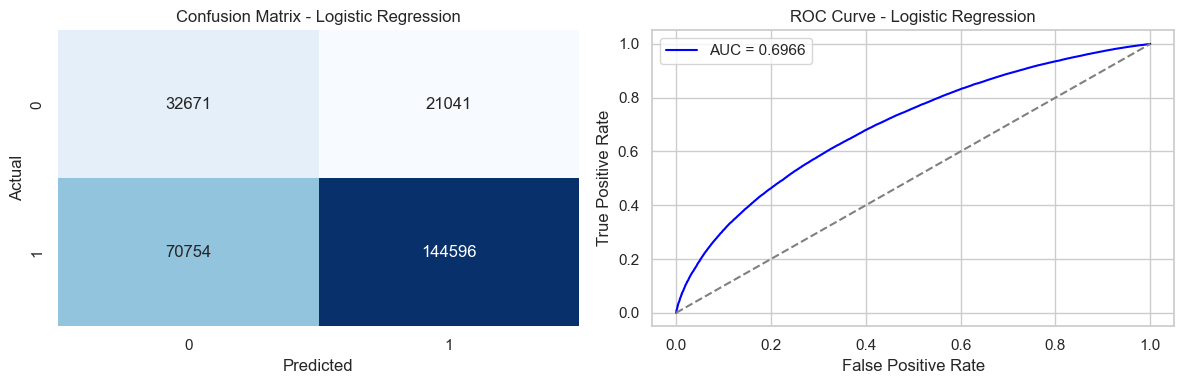

In [18]:
print("🚀 Sedang melatih Logistic Regression...")

# --- A. TRAINING ---
lr_model = LogisticRegression(
    max_iter=1000, 
    solver="liblinear", 
    class_weight="balanced", 
    random_state=42
)
lr_model.fit(X_train_scaled, y_train)

# --- B. PREDIKSI & AUC ---
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"\n🔹 Logistic Regression AUC-ROC: {auc_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# --- C. VISUALISASI ---
plt.figure(figsize=(12, 4))

# 1. Confusion Matrix
plt.subplot(1, 2, 1)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 2. ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f"AUC = {auc_lr:.4f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.tight_layout()
plt.show()

🚀 Sedang melatih XGBoost...


c:\Users\ASUS\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



🔸 XGBoost AUC-ROC: 0.7061

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.04      0.08     53712
           1       0.81      0.99      0.89    215350

    accuracy                           0.80    269062
   macro avg       0.68      0.52      0.48    269062
weighted avg       0.75      0.80      0.73    269062



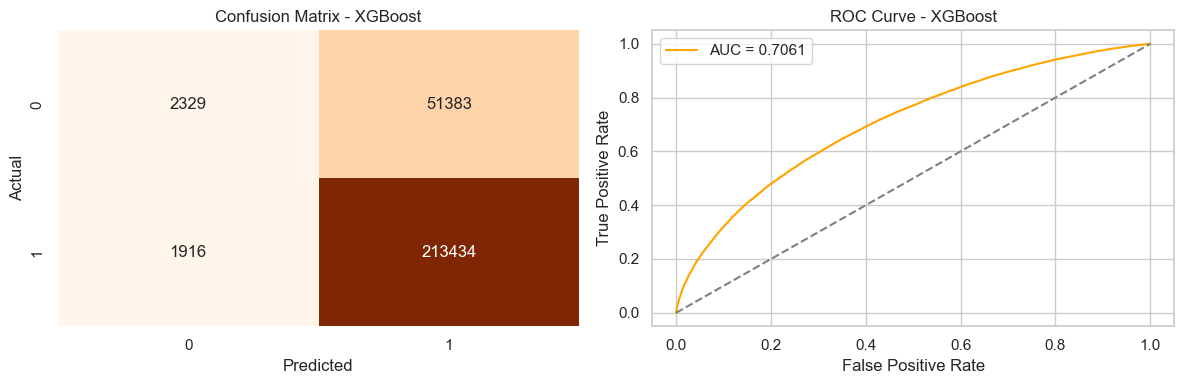

In [19]:
print("🚀 Sedang melatih XGBoost...")

# --- A. TRAINING ---
xgb_model = XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss",
    n_estimators=300,        
    max_depth=5,             
    learning_rate=0.05,      
    subsample=0.8,           
    colsample_bytree=0.8,    
    random_state=42, 
    n_jobs=-1,
    use_label_encoder=False
)
xgb_model.fit(X_train_scaled, y_train)

# --- B. PREDIKSI & AUC ---
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"\n🔸 XGBoost AUC-ROC: {auc_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# --- C. VISUALISASI ---
plt.figure(figsize=(12, 4))

# 1. Confusion Matrix
plt.subplot(1, 2, 1)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 2. ROC Curve
plt.subplot(1, 2, 2)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {auc_xgb:.4f}", color="orange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
print("💾 Menyimpan model ke file .pkl...")

joblib.dump(lr_model, "logreg_model.pkl")   # Model LR
joblib.dump(xgb_model, "xgb_model.pkl")     # Model XGB
joblib.dump(scaler, "scaler.pkl")           # Scaler (Hanya 5 fitur)
joblib.dump(features, "feature_list.pkl")   # Daftar Fitur

print("🎉 Selesai! Model sudah diperbarui dengan 5 fitur dan siap untuk App.")

💾 Menyimpan model ke file .pkl...
🎉 Selesai! Model sudah diperbarui dengan 5 fitur dan siap untuk App.
